In [314]:
%matplotlib inline

from modsim import *

In [397]:
# PROJECTILE MOTION CONDITIONS

condition = Condition(x = 0, 
                      y = 0,
                      g = 9.8,
                      mass = 31950,
                      diameter = 4, #taken from average of height, width, and length
                      rho = 1.225, #density of air
                      C_d = 800, #drag coefficient 
                      angle = 30,
                      velocity = 221,
                      duration = 4*3600)

In [398]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 21)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

system = make_system(condition)
system

,value
init,x 0.000000 y 0.000000 vx 191.39...
g,9.8
mass,31950
area,12.5664
rho,1.225
C_d,800
ts,"[0.0, 720.0, 1440.0, 2160.0, 2880.0, 3600.0, 4..."


In [399]:
#slope function that computes acceleration due to gravity and drag

def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state
    unpack(system)
    
    a_grav = Vector(0, -g)
        
    v = Vector(vx, vy)
    
    f_drag = -rho * v**2 * C_d * (area / 2)
    a_drag = f_drag / mass
    
    lift = 3.288 * rho * (v**2 / 2) * 105.4
    l = lift / mass
    
    #thrust = 100000 * v.angle
    thrust = 19985.515110128345 * v.angle
    a_thrust = thrust / mass

    a = a_grav + a_drag + a_thrust + l
    print(l)
    
    return vx, vy, a.x, a.y



In [400]:
run_odeint(system, slope_func)

[ 243.36238956   81.12079652] dimensionless
[ 243.36238956   81.12079652] dimensionless
[ 243.35133433   81.11865996] dimensionless
[ 243.35133483   81.11866001] dimensionless
[ 243.34028035   81.11652353] dimensionless
[ 243.34028085   81.11652359] dimensionless
[ 242.45534719   80.94529248] dimensionless
[ 242.45534276   80.9452922 ] dimensionless
[ 241.57523215   80.7746015 ] dimensionless
[ 241.57522338   80.77460093] dimensionless
[ 240.69989649   80.6044481 ] dimensionless
[ 240.6998878    80.60444754] dimensionless
[ 237.20184924   79.92054664] dimensionless
[ 237.2017942    79.92054294] dimensionless
[ 237.99453016   80.07607821] dimensionless
[ 237.99449662   80.07607598] dimensionless
[ 235.33441756   79.55286562] dimensionless
[ 235.33445739   79.55286809] dimensionless
[ 232.71876319   79.03475704] dimensionless
[ 232.71876787   79.03475722] dimensionless
[ 230.14644372   78.52167721] dimensionless
[ 230.14644827   78.52167739] dimensionless
[ 225.1281088    77.51035133] di

C:\ProgramData\Miniconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [403]:
xs = system.results.x/60/60
ys = system.results.y
print(ys)

0.0         0.000000e+00
720.0      -8.841605e+01
1440.0     6.013470e-154
2160.0     5.981422e-154
2880.0     1.106400e+200
3600.0     6.013470e-154
4320.0     1.059190e-153
5040.0     6.013470e-154
5760.0     5.981902e-154
6480.0     6.013470e-154
7200.0     2.523002e-258
7920.0     5.981475e-154
8640.0     3.946618e+180
9360.0     2.116712e+214
10080.0    6.013470e-154
10800.0    7.274327e+199
11520.0    1.232008e+277
12240.0    2.031508e+174
12960.0    7.682944e+218
13680.0    9.628673e+199
14400.0    3.021877e+257
Name: y, dtype: float64


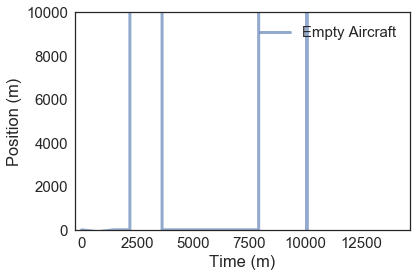

In [404]:
newfig()
plot(ys, label='Empty Aircraft')
#plot(ys, label='y')

#print (xs, ys)

decorate(xlabel='Time (m)',
         ylabel='Position (m)',
         ylim=[0, 10000])


In [333]:
cruising_alt_point = interp_inverse (ys)
cruising_alt_point(10000)

array(0.007902720996795893)

In [326]:
mass_array = [0, 14000, 21000, 28000, 35000, 41000]

In [327]:
def plot_flight(added_mass):
    condition.set(mass=31950+added_mass)
    system = make_system(condition)
    run_odeint(system, slope_func)
    xs = system.results.x/3600
    ys = system.results.y
    #print(system.results)
    plot(xs, ys, label=str(added_mass)+ 'kg of cargo')

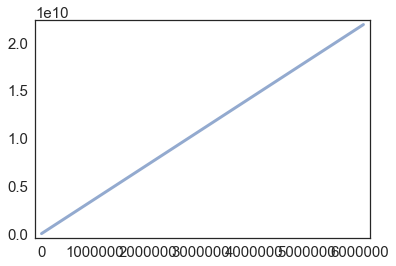

In [328]:
plot_flight(14000)

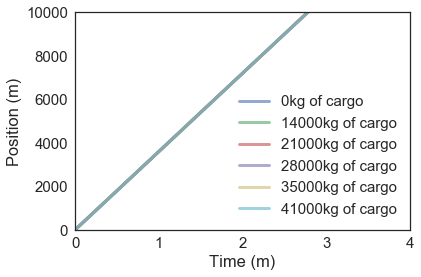

In [329]:
newfig()
for added_mass in mass_array:
    plot_flight(added_mass)
    
decorate(xlabel='Time (m)',
         ylabel='Position (m)',
         xlim=[0, 4],
         ylim=[0, 10000])

In [332]:
 t_peak = ys.argmax()
descent = ys.loc[t_peak:]
T = interp_inverse(descent, kind='linear')

ValueError: x and y arrays must have at least 2 entries

In [ ]:
metric_array = []
    for m in mass_array
        run_simulation
        metrics.append(metric)

In [ ]:
plot (mass_array, metric_array)

In [296]:
'''def sweep_mass(mass_array):
    sweep = SweepSeries()
    for mass in mass_array:
        condition.set(mass = mass)
        system = make_system(condition)
        run_odeint(system, slope_func)
        sweep[mass] = calc_cruise_time(system)
    return sweep
    '''

'def sweep_mass(mass_array):\n    sweep = SweepSeries()\n    for mass in mass_array:\n        condition.set(mass = mass)\n        system = make_system(condition)\n        run_odeint(system, slope_func)\n        sweep[mass] = calc_cruise_time(system)\n    return sweep\n    '

In [297]:
'''def calc_cruise_time(system):
    ys = system.results.y
    T = interp_inverse(ys, kind='cubic')
    return T(10000)
'''

"def calc_cruise_time(system):\n    ys = system.results.y\n    T = interp_inverse(ys, kind='cubic')\n    return T(10000)\n"

In [298]:
'''newfig()
mass_sweep = sweep_mass(mass_array)

plot(mass_sweep)
decorate(title = 'Mass Sweep')
'''

"newfig()\nmass_sweep = sweep_mass(mass_array)\n\nplot(mass_sweep)\ndecorate(title = 'Mass Sweep')\n"